In [1]:
# Sales Data Analysis Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("sales_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month_name()

# Display first few rows
df.head()


,Date,Product,Units_Sold,Unit_Price,Revenue,Month
0,2023-01-01,Monitor,10,42131,421310,January
1,2023-01-02,Headphones,98,47944,4698512,January
2,2023-01-03,Smartphone,51,13427,684777,January
3,2023-01-04,Headphones,59,46348,2734532,January
4,2023-01-05,Headphones,44,29285,1288540,January


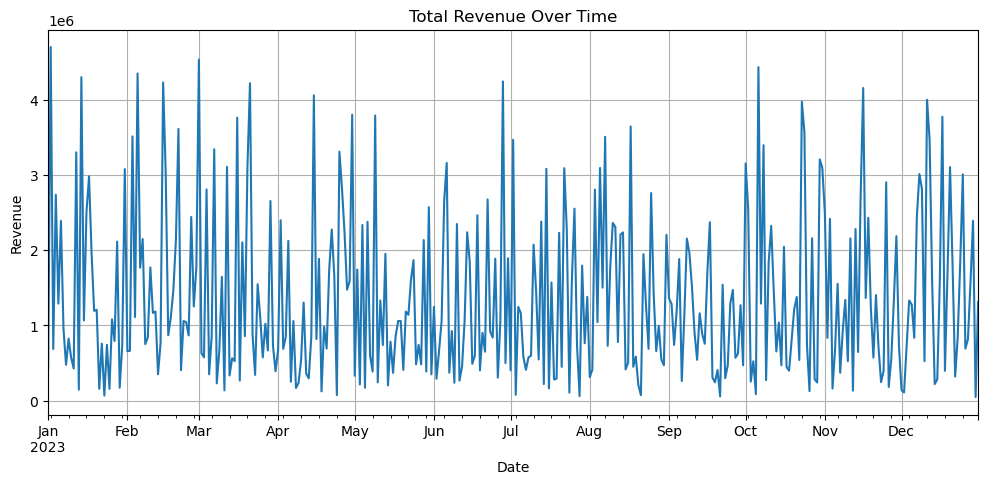

In [2]:
#1.Total Revenue Over Time
plt.figure(figsize=(12, 5))
df.groupby("Date")["Revenue"].sum().plot()
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


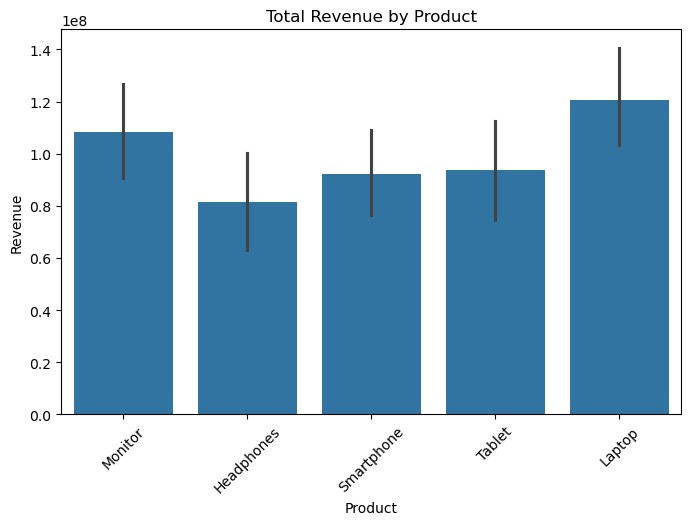

In [3]:
#2.Product-wise Total Revenue
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Product", y="Revenue", estimator=sum)
plt.title("Total Revenue by Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


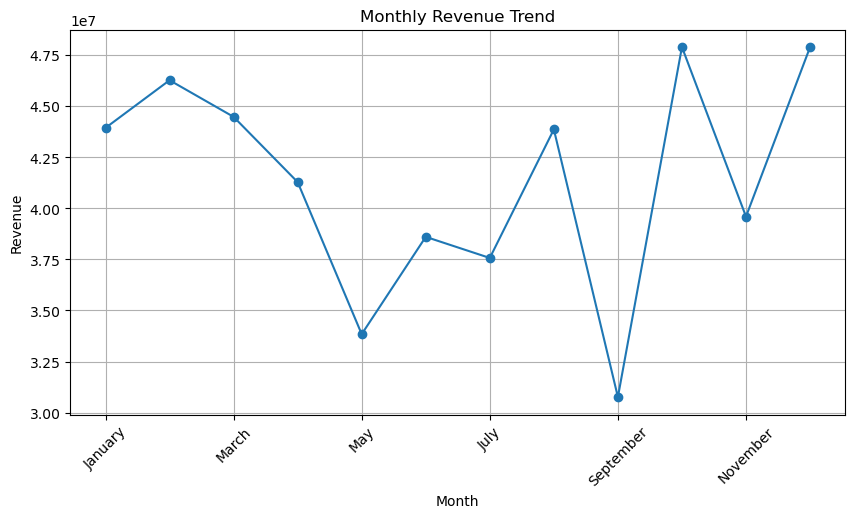

In [4]:
#3.Monthly Revenue Trend
monthly_rev = df.groupby("Month")["Revenue"].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 5))
monthly_rev.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


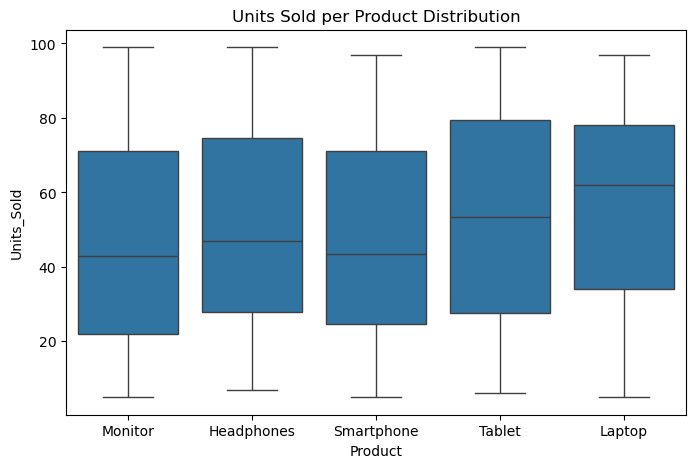

In [5]:
#4.Units Sold Per Product

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Product", y="Units_Sold")
plt.title("Units Sold per Product Distribution")
plt.show()


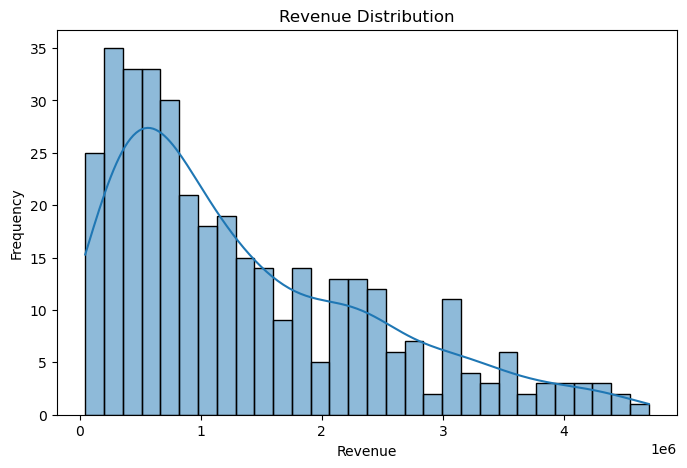

In [6]:
#5.Revenue Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Revenue"], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


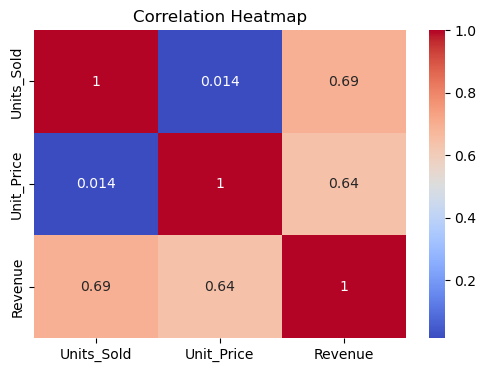

In [7]:
#6.Correlation Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(df[["Units_Sold", "Unit_Price", "Revenue"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


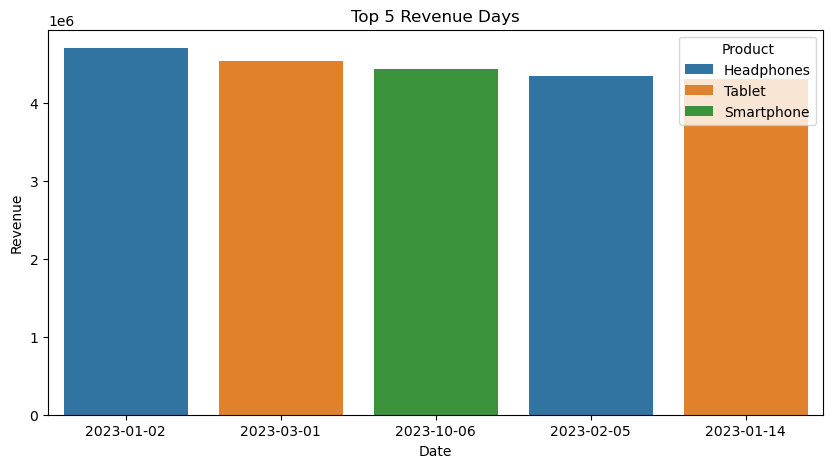

In [8]:
#7.Top 5 Revenue Days
top_days = df.sort_values(by="Revenue", ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_days, x="Date", y="Revenue", hue="Product")
plt.title("Top 5 Revenue Days")
plt.show()


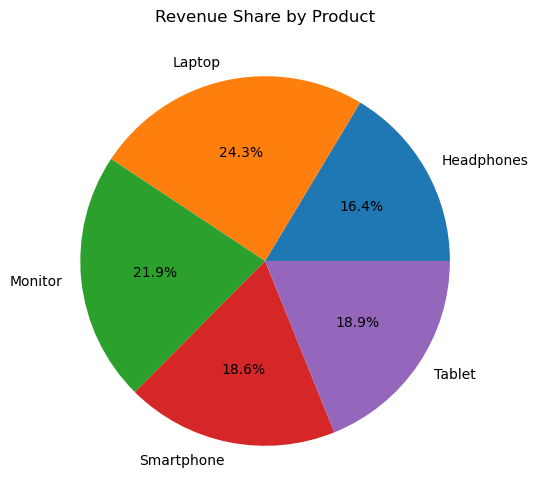

In [9]:
#8.Pie Chart of Revenue Share by Product
plt.figure(figsize=(6, 6))
df.groupby("Product")["Revenue"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Revenue Share by Product")
plt.ylabel("")
plt.show()
